### select best results cell scaling 

In [1]:
import pandas as pd
import glob
import os

csv_dir = "/home/igor/igor_repos/noise_scaling_laws/Scaling-up-measurement-noise-scaling-laws/analysis/intermediate_cell_scaling_fits"
csv_files = glob.glob(os.path.join(csv_dir, "*.csv"))

all_data = []
for file in csv_files:
    df = pd.read_csv(file)
    all_data.append(df)

combined_df = pd.concat(all_data, ignore_index=True)

combined_df = combined_df[combined_df['avg_uncertainty_error'] != 0.0]

grouping_cols = ['dataset', 'method', 'metric', 'quality']
tightest_fits = combined_df.loc[combined_df.groupby(grouping_cols)['avg_uncertainty_error'].idxmin()]

tightest_fits_to_save = tightest_fits.drop(columns=['result'])

output_path = "/home/igor/igor_repos/noise_scaling_laws/Scaling-up-measurement-noise-scaling-laws/analysis/final_results/cell_scaling.csv"
tightest_fits_to_save.to_csv(output_path, index=False)

print(f"Total rows in combined data: {len(combined_df)}")
print(f"Rows with tightest fits: {len(tightest_fits)}")
print(f"Saved tightest fits to: {output_path}")
tightest_fits.head()


Total rows in combined data: 18931
Rows with tightest fits: 200
Saved tightest fits to: /home/igor/igor_repos/noise_scaling_laws/Scaling-up-measurement-noise-scaling-laws/analysis/final_results/cell_scaling.csv


,dataset,method,metric,quality,N0,s,I_inf,N0_error,s_error,I_inf_error,mean_residual,avg_uncertainty_error,result
13200,PBMC,Geneformer,celltype.l3,0.001235,10.000,0.626,0.639,4.940000e-01,0.373,0.035,0.057,0.139,<lmfit.model.ModelResult object at 0x7bfa885be...
1,PBMC,Geneformer,celltype.l3,0.002598,12.728,0.562,1.035,6.014000e+00,0.127,0.020,0.030,0.029,<lmfit.model.ModelResult object at 0x7bfa9896f...
13602,PBMC,Geneformer,celltype.l3,0.005468,10.000,0.425,1.413,6.150000e-01,0.225,0.066,0.055,0.161,<lmfit.model.ModelResult object at 0x7bfa96666...
12603,PBMC,Geneformer,celltype.l3,0.011508,9999999.681,0.050,3.124,9.557139e+08,0.182,5.464,0.091,6.969,<lmfit.model.ModelResult object at 0x7bfa968b1...
7604,PBMC,Geneformer,celltype.l3,0.024220,16.133,0.253,2.201,2.088200e+01,0.344,0.406,0.151,0.182,<lmfit.model.ModelResult object at 0x7bfa96c24...


Number of rows in tightest fits: 200


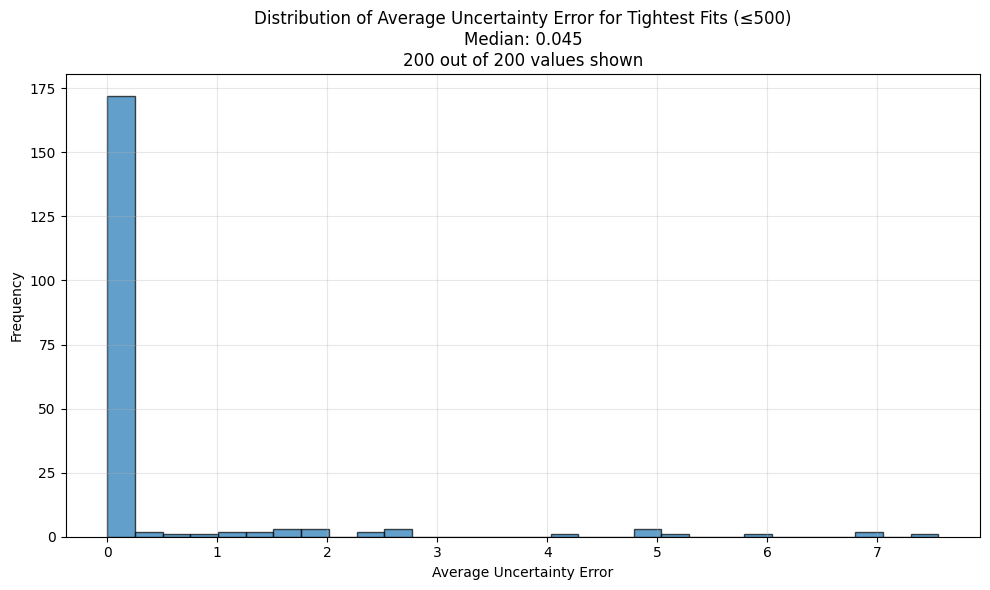

Average Uncertainty Error Statistics for Tightest Fits:
Mean: 0.451
Median: 0.045
Std: 1.277
Min: 0.001
Max: 7.556
Number of filtered values: 200 out of 200 total


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print(f"Number of rows in tightest fits: {len(tightest_fits)}")

avg_uncertainty_error = tightest_fits['avg_uncertainty_error']

avg_uncertainty_error_filtered = avg_uncertainty_error[np.isfinite(avg_uncertainty_error) & (avg_uncertainty_error <= 500)]

plt.figure(figsize=(10, 6))
plt.hist(avg_uncertainty_error_filtered, bins=30, alpha=0.7, edgecolor='black')
plt.xlabel('Average Uncertainty Error')
plt.ylabel('Frequency')
plt.title(f'Distribution of Average Uncertainty Error for Tightest Fits (≤500)\nMedian: {avg_uncertainty_error_filtered.median():.3f}\n{len(avg_uncertainty_error_filtered)} out of {len(tightest_fits)} values shown')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Average Uncertainty Error Statistics for Tightest Fits:")
print(f"Mean: {avg_uncertainty_error_filtered.mean():.3f}")
print(f"Median: {avg_uncertainty_error_filtered.median():.3f}")
print(f"Std: {avg_uncertainty_error_filtered.std():.3f}")
print(f"Min: {avg_uncertainty_error_filtered.min():.3f}")
print(f"Max: {avg_uncertainty_error_filtered.max():.3f}")
print(f"Number of filtered values: {len(avg_uncertainty_error_filtered)} out of {len(tightest_fits)} total")


### select best results noise scaling 

In [5]:
import pandas as pd
import glob
import os

csv_dir = "/home/igor/igor_repos/noise_scaling_laws/Scaling-up-measurement-noise-scaling-laws/analysis/intermediate_fits_noise_scaling"
csv_file = os.path.join(csv_dir, "scaling_plots_u_bar_125.802_I_max_2.712.csv")

combined_df = pd.read_csv(csv_file)

combined_df = combined_df[combined_df['avg_uncertainty_error'] != 0.0]

grouping_cols = ['dataset', 'method', 'metric', 'size']
tightest_fits = combined_df.loc[combined_df.groupby(grouping_cols)['avg_uncertainty_error'].idxmin()]

output_path = "/home/igor/igor_repos/noise_scaling_laws/Scaling-up-measurement-noise-scaling-laws/analysis/final_results/noise_scaling.csv"
tightest_fits.to_csv(output_path, index=False)

print(f"Total rows in combined data: {len(combined_df)}")
print(f"Rows with tightest fits: {len(tightest_fits)}")
print(f"Saved tightest fits to: {output_path}")
tightest_fits.head()


Total rows in combined data: 200
Rows with tightest fits: 200
Saved tightest fits to: /home/igor/igor_repos/noise_scaling_laws/Scaling-up-measurement-noise-scaling-laws/analysis/final_results/noise_scaling.csv


,dataset,method,metric,size,fitted_u_bar,fitted_I_max,u_bar_error,I_max_error,avg_uncertainty_error
10,PBMC,Geneformer,celltype.l3,100,166.228,2.032,22.114,0.039,0.073
11,PBMC,Geneformer,celltype.l3,215,202.116,2.177,42.614,0.069,0.119
12,PBMC,Geneformer,celltype.l3,464,244.476,2.401,36.575,0.054,0.092
13,PBMC,Geneformer,celltype.l3,1000,277.874,2.527,65.738,0.087,0.146
14,PBMC,Geneformer,celltype.l3,2154,224.915,2.419,66.764,0.105,0.181


Number of rows in tightest fits: 200


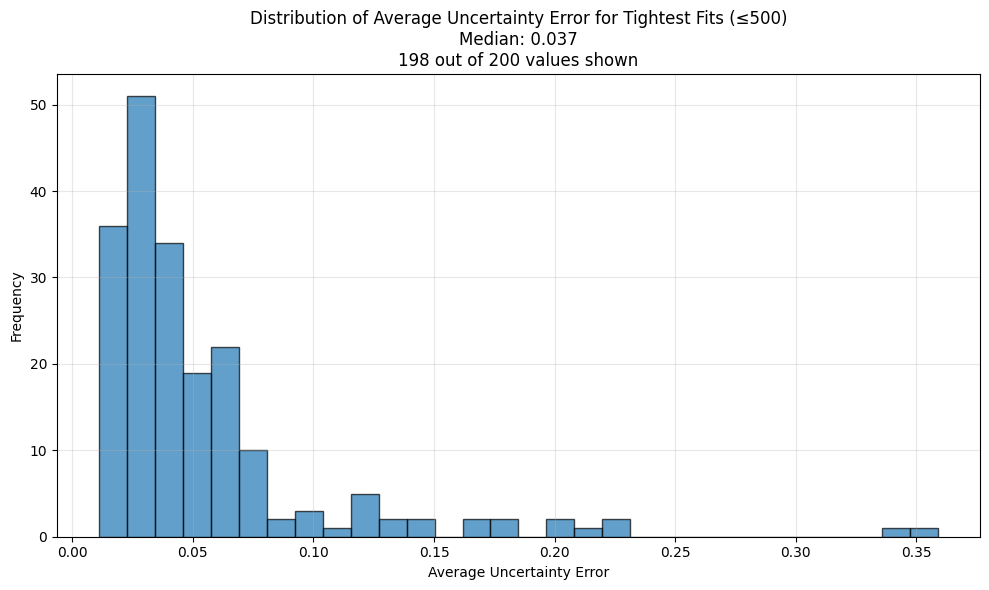

Average Uncertainty Error Statistics for Tightest Fits:
Mean: 0.054
Median: 0.037
Std: 0.052
Min: 0.011
Max: 0.359
Number of filtered values: 198 out of 200 total


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print(f"Number of rows in tightest fits: {len(tightest_fits)}")

avg_uncertainty_error = tightest_fits['avg_uncertainty_error']

avg_uncertainty_error_filtered = avg_uncertainty_error[np.isfinite(avg_uncertainty_error) & (avg_uncertainty_error <= 500)]

plt.figure(figsize=(10, 6))
plt.hist(avg_uncertainty_error_filtered, bins=30, alpha=0.7, edgecolor='black')
plt.xlabel('Average Uncertainty Error')
plt.ylabel('Frequency')
plt.title(f'Distribution of Average Uncertainty Error for Tightest Fits (≤500)\nMedian: {avg_uncertainty_error_filtered.median():.3f}\n{len(avg_uncertainty_error_filtered)} out of {len(tightest_fits)} values shown')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Average Uncertainty Error Statistics for Tightest Fits:")
print(f"Mean: {avg_uncertainty_error_filtered.mean():.3f}")
print(f"Median: {avg_uncertainty_error_filtered.median():.3f}")
print(f"Std: {avg_uncertainty_error_filtered.std():.3f}")
print(f"Min: {avg_uncertainty_error_filtered.min():.3f}")
print(f"Max: {avg_uncertainty_error_filtered.max():.3f}")
print(f"Number of filtered values: {len(avg_uncertainty_error_filtered)} out of {len(tightest_fits)} total")
